In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   
%matplotlib inline

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot


#for offline plotting
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)


In [20]:
tesla = pd.read_csv("C:/Users/HP/OneDrive/Desktop/jupyter notebook/tesla_stock.xlsx.csv")
tesla.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [21]:
tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1599 non-null   object 
 1   Open       1599 non-null   float64
 2   High       1599 non-null   float64
 3   Low        1599 non-null   float64
 4   Close      1599 non-null   float64
 5   Adj Close  1599 non-null   float64
 6   Volume     1599 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 87.6+ KB


In [22]:
tesla['Date'] = pd.to_datetime(tesla['Date' ])

In [23]:
print(f'Dataframe contains stock prices between {tesla.Date.min()} {tesla.Date.max()}')
print(f'Total days={(tesla.Date.max() - tesla.Date.min()).days} days')

Dataframe contains stock prices between 2010-06-29 00:00:00 2016-11-01 00:00:00
Total days=2317 days


In [24]:
tesla.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1.599000e+03
mean,127.014196,129.278530,124.581151,126.959637,126.959637,4.233008e+06
std,93.916806,95.318028,92.386128,93.876026,93.876026,4.388525e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,29.525000,30.000000,28.750000,29.415000,29.415000,1.149500e+06
50%,140.149994,143.600006,136.339996,139.360001,139.360001,3.022000e+06
75%,217.885002,221.430001,214.589996,218.299996,218.299996,5.651150e+06
max,287.670013,291.420013,280.399994,286.040009,286.040009,3.716390e+07


<AxesSubplot:>

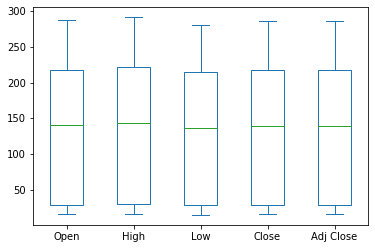

In [25]:
tesla[['Open','High','Low','Close','Adj Close']].plot(kind='box')

In [26]:
# Setting the lauout for our slot
layout = go.Layout(
    title='Stock Prices of Tesla',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Price',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

tesla_data = [{'x':tesla['Date'], 'y':tesla['Close']}]
plot = go.Figure(data=tesla_data, layout=layout)


In [27]:
iplot(plot)

In [28]:
#Building the regression model
from sklearn.model_selection import train_test_split

#for preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#for model evaluation
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score



In [29]:
#split the data into train and test sets
X = np.array(tesla.index).reshape(-1,1)            #independent variables
Y = tesla['Close']                                 #dependent variable
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)


In [30]:
# Feature Scaling
scaler = StandardScaler().fit(X_train)

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
# Creating a linear model
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

In [33]:
#Plot actual and predicted value for train dataset
trace0 = go.Scatter(
    x = X_train.T[0],
    y = Y_train,
    mode = 'markers',
    name = 'Actual'
)
trace1 = go.Scatter(
    x = X_train.T[0],
    y = lm.predict(X_train).T,
    mode = 'lines',
    name = 'Predicted'
)
tesla_data = [trace0,trace1]
layout.xaxis.title.text = 'Day'
plot2 = go.Figure(data=tesla_data, layout=layout)

In [34]:
iplot(plot2)

In [35]:
# Calculate scores for model evaluation
scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train, lm.predict(X_train))}\t{r2_score(Y_test, lm.predict(X_test))}
{'MSE'.ljust(10)}{mse(Y_train, lm.predict(X_train))}\t{mse(Y_test, lm.predict(X_test))}
'''
print(scores)


Metric           Train                Test        
r2_score  0.7985463259454685	0.8036819869600962
MSE       1785.7206134838352	1702.9039040267546

